Imports

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


Multiple Linear Regression

In [7]:
data = pd.read_csv("drying_time_data.csv")  
data = data.dropna()
data.head()

,mc_initial,temperature,humidity,mc_final,drying_time
0,16.5,29.6,78,11.0,7.0
1,17.0,29.6,78,10.0,7.0
2,17.0,29.6,78,10.5,7.0
3,17.5,29.6,78,10.0,7.0
4,17.5,29.6,78,10.5,7.0


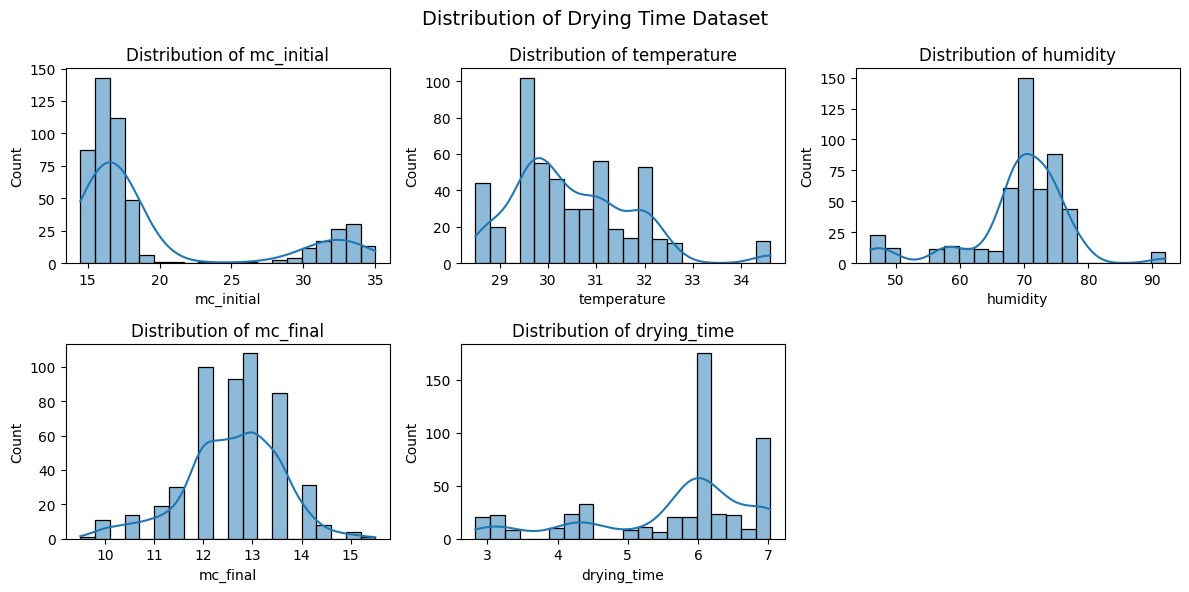

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distributions(dataset, title):
    plt.figure(figsize=(12, 6))
    for i, column in enumerate(dataset.columns, 1):
        plt.subplot(2, len(dataset.columns) // 2 + 1, i)
        sns.histplot(dataset[column], kde=True, bins=20)
        plt.title(f"Distribution of {column}")
    plt.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.show()

# Plot distributions for each dataset
plot_distributions(data, "Distribution of Drying Time Dataset")

In [9]:
X = data[["mc_initial", "temperature", "humidity", "mc_final"]]  # Features
y = data["drying_time"]  # Target

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # Scale features to a range of [0, 1]

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the multiple linear regression model
model_mlr = LinearRegression()
model_mlr.fit(X_train, y_train)

#  Make predictions
y_pred_mlr = model_mlr.predict(X_test)

# Calculate metrics
mse_mlr = mean_squared_error(y_test, y_pred_mlr)
rmse_mlr = np.sqrt(mse_mlr)
mae_mlr = mean_absolute_error(y_test, y_pred_mlr)
r2_mlr = r2_score(y_test, y_pred_mlr)

# Filter out zero values in y_test
nonzero_indices = y_test != 0  
y_test_filtered = y_test[nonzero_indices]
predictions_filtered = y_pred_mlr[nonzero_indices]

#Compute MAPE only for non-zero actual values
if len(y_test_filtered) > 0:
    mape_mlr = np.mean(np.abs((y_test_filtered - predictions_filtered) / y_test_filtered)) * 100  
    accuracy_mlr = 100 - mape_mlr
else:
    mape_mlr = np.nan
    accuracy_mlr = np.nan

accuracy_mlr = 100 - mape_mlr

print("Multiple Linear Regression training completed. ")
print(f"MSE: {mse_mlr:.5f}, RMSE: {rmse_mlr:.5f}, MAE: {mae_mlr:.5f}, "
      f"R2: {r2_mlr:.5f}, MAPE: {mape_mlr:.5f}%, Accuracy: {accuracy_mlr:.5f}%")

Multiple Linear Regression training completed. 
MSE: 0.88094, RMSE: 0.93858, MAE: 0.71918, R2: 0.21983, MAPE: 14.21609%, Accuracy: 85.78391%


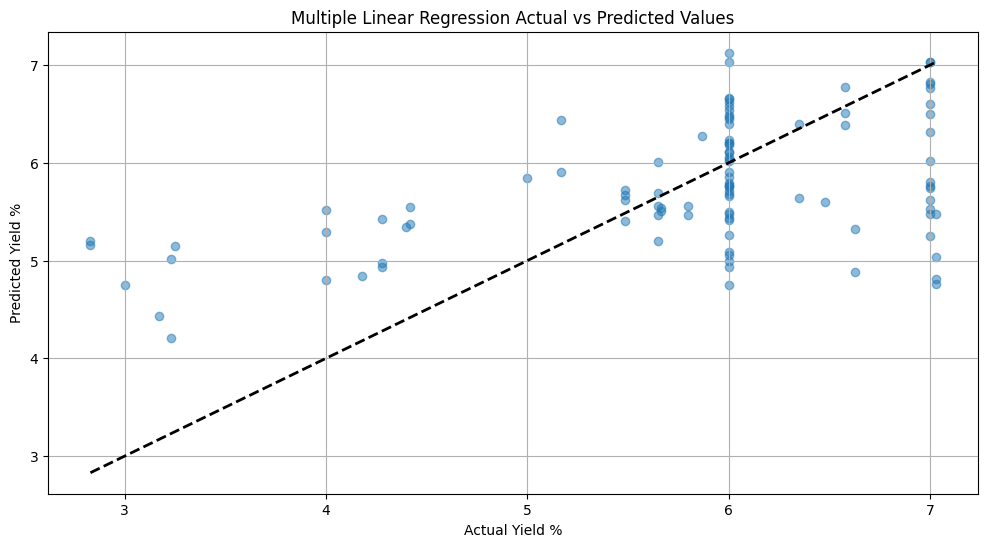

In [10]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_mlr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Multiple Linear Regression Actual vs Predicted Values')
plt.xlabel('Actual Yield %')
plt.ylabel('Predicted Yield %')
plt.grid(True)
plt.show()

Random Forest Regression

In [12]:
from sklearn.ensemble import RandomForestRegressor
data = pd.read_csv("drying_time_data.csv")  
data = data.dropna()
data.head()

X = data[["mc_initial", "temperature", "humidity", "mc_final"]]  # Features
y = data["drying_time"]  # Target

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # Scale features to a range of [0, 1]

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# train the random forest regression model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = model_rf.predict(X_test)

# Calculate metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Filter out zero values in y_test
nonzero_indices = y_test != 0  
y_test_filtered = y_test[nonzero_indices]
predictions_filtered = y_pred_rf[nonzero_indices]

#Compute MAPE only for non-zero actual values
if len(y_test_filtered) > 0:
    mape_rf = np.mean(np.abs((y_test_filtered - predictions_filtered) / y_test_filtered)) * 100  
    accuracy_rf = 100 - mape_rf
else:
    mape_rf = np.nan
    accuracy_rf = np.nan

accuracy_rf = 100 - mape_rf


print("Random Forest Regression completed. Metrics and coefficients saved.")
print(f"MSE: {mse_rf:.5f}, RMSE: {rmse_rf:.5f}, MAE: {mae_rf:.5f}, "
      f"R2: {r2_rf:.5f}, MAPE: {mape_rf:.5f}%, Accuracy: {accuracy_rf:.5f}%")

Random Forest Regression completed. Metrics and coefficients saved.
MSE: 0.03223, RMSE: 0.17953, MAE: 0.08686, R2: 0.97146, MAPE: 1.78302%, Accuracy: 98.21698%


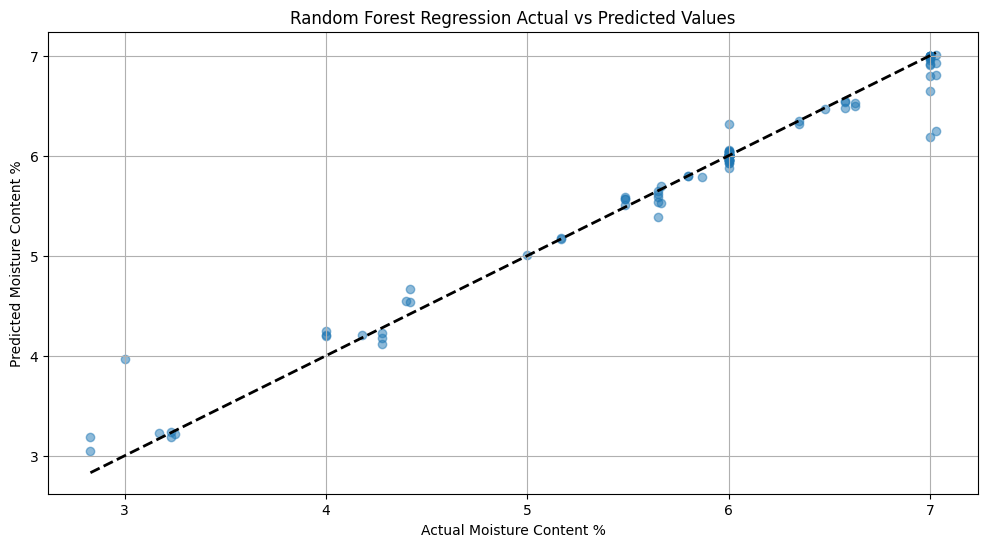

In [13]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Random Forest Regression Actual vs Predicted Values')
plt.xlabel('Actual Moisture Content %')
plt.ylabel('Predicted Moisture Content %')
plt.grid(True)
plt.show()

In [14]:
feature_importance = model_rf.feature_importances_
print("Feature Importance:", feature_importance)

Feature Importance: [0.11577299 0.45075832 0.28017583 0.15329286]


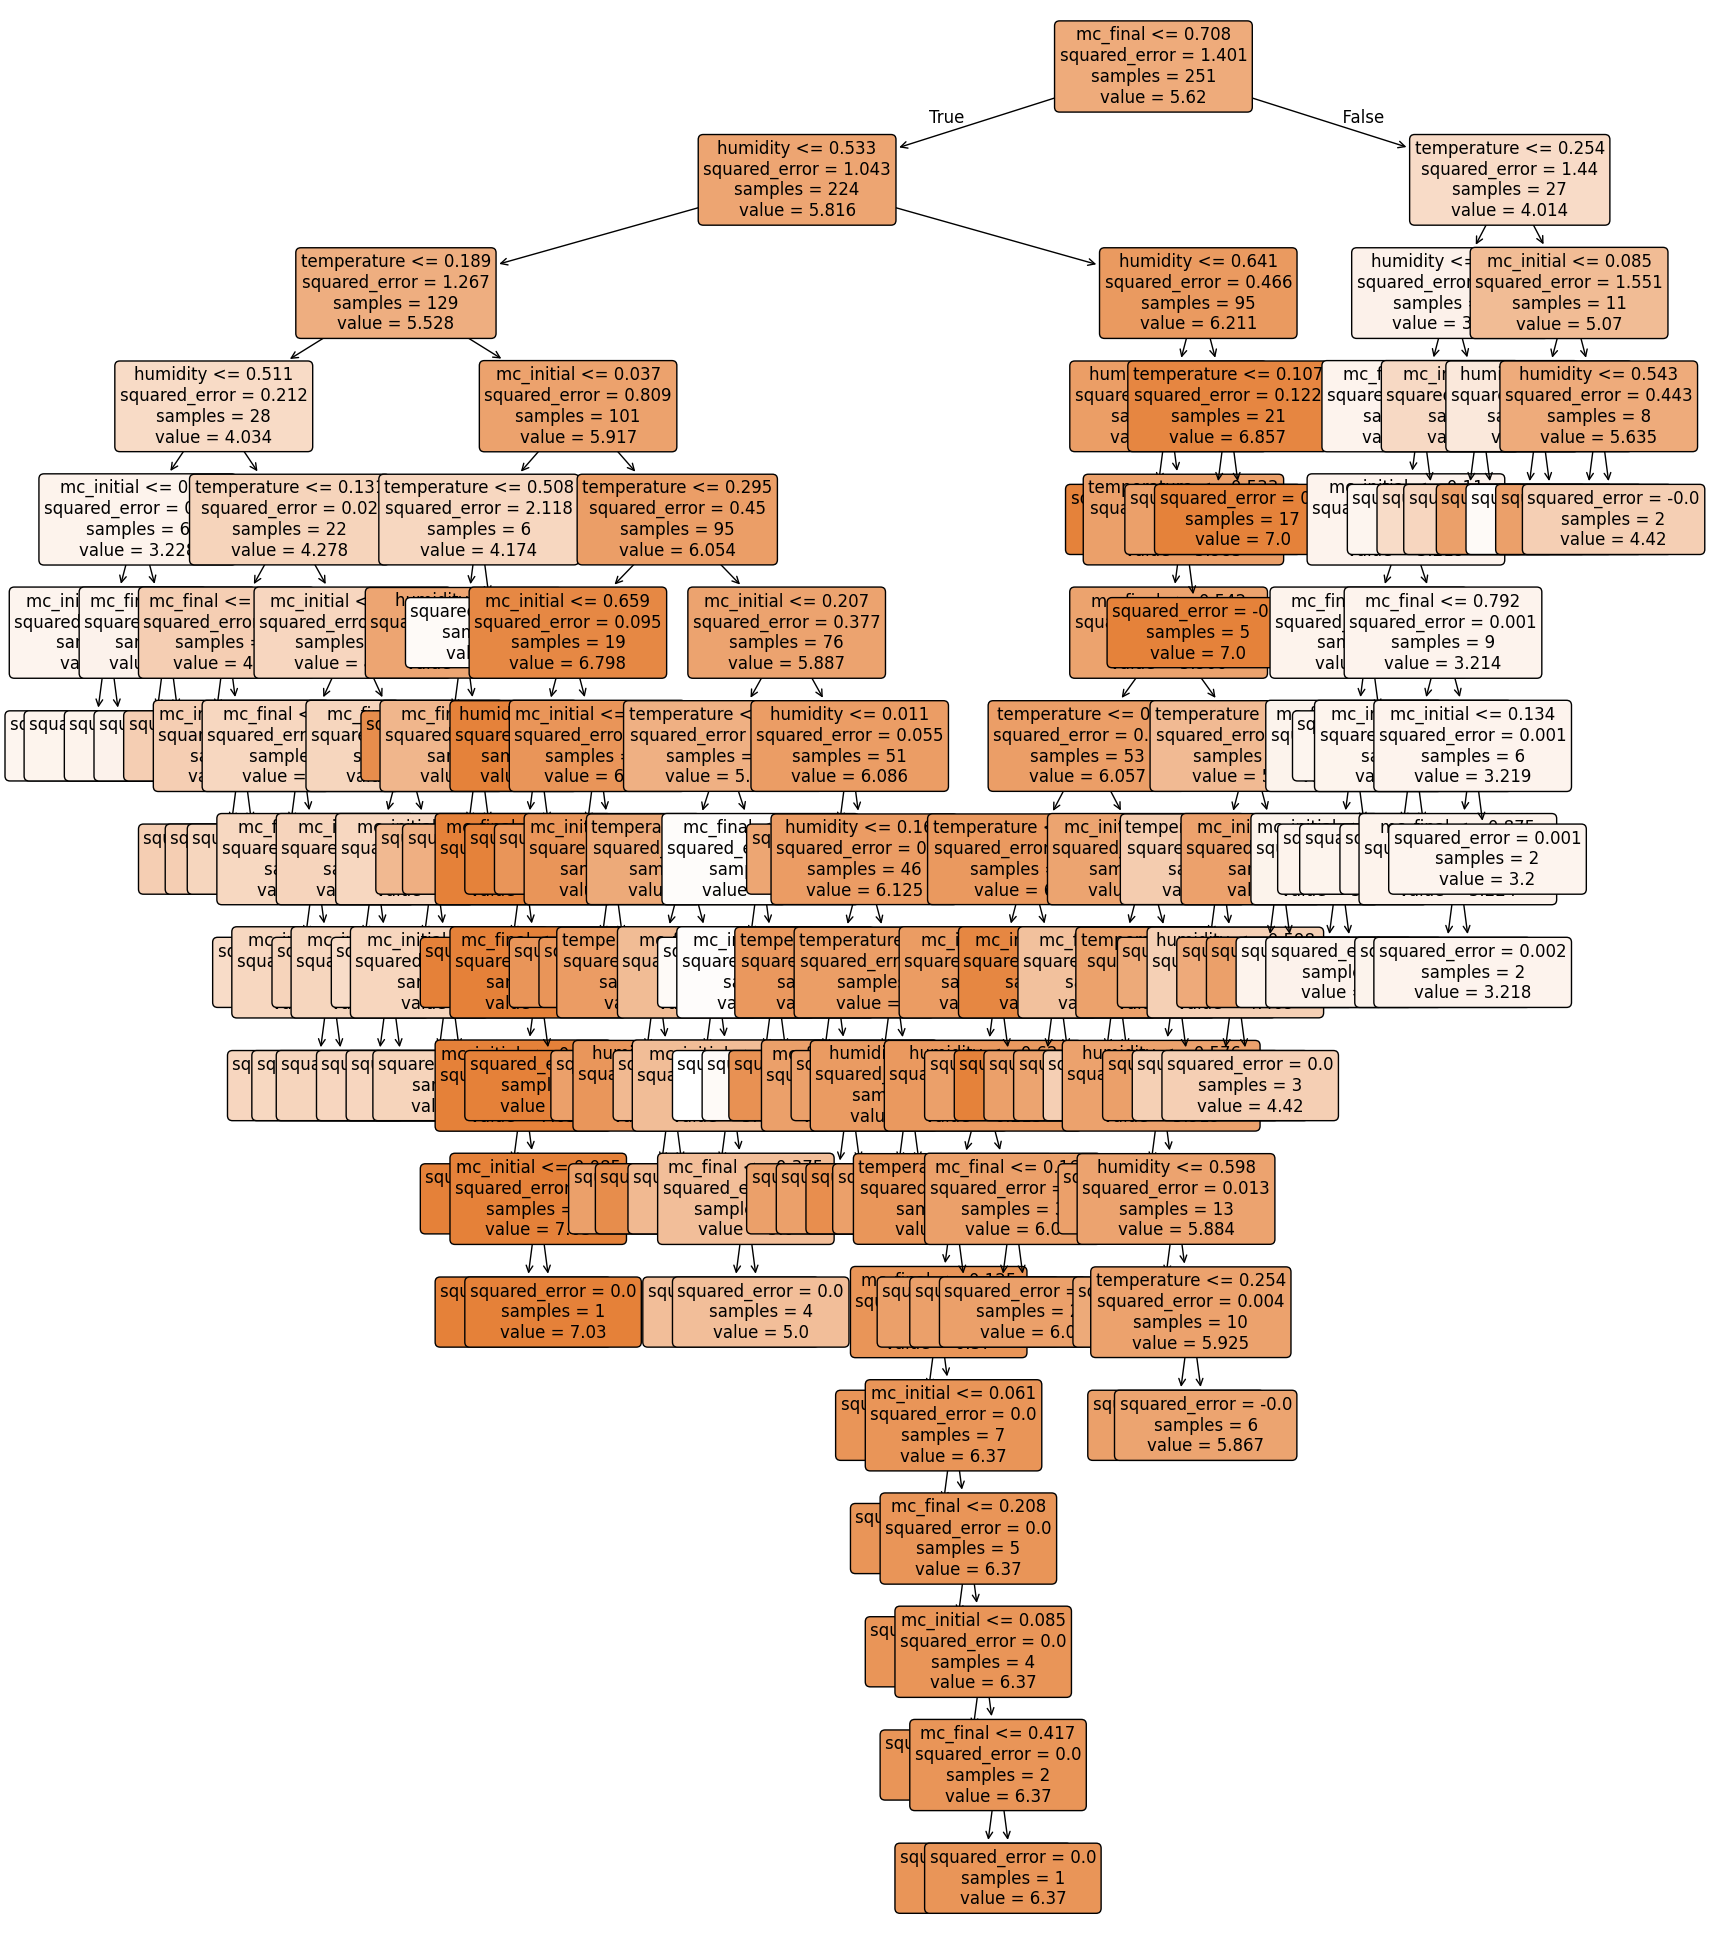

In [16]:
from sklearn.tree import plot_tree
# Feature Names
feature_names = ["mc_initial", "temperature", "humidity", "mc_final"]
# Visualize the First Tree in the Random Forest
plt.figure(figsize=(20, 25))
plot_tree(model_rf.estimators_[0], feature_names=feature_names, filled=True, rounded=True, fontsize=12)
plt.show()

Multilayer Perceptron

In [32]:
import tensorflow as tf
from sklearn.neural_network import MLPRegressor
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import metrics
from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error, r2_score

In [33]:
data = pd.read_csv("drying_time_data.csv")  
data = data.dropna()
data.head()

,mc_initial,temperature,humidity,mc_final,drying_time
0,16.5,29.6,78,11.0,7.0
1,17.0,29.6,78,10.0,7.0
2,17.0,29.6,78,10.5,7.0
3,17.5,29.6,78,10.0,7.0
4,17.5,29.6,78,10.5,7.0


In [34]:
X = data[["mc_initial", "temperature", "humidity", "mc_final"]]  # Features
y = data["drying_time"]  # Target

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # Scale features to a range of [0, 1]

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [87]:
model_mlp = MLPRegressor(
    hidden_layer_sizes=(512, 256, 128),
    activation='relu',
    solver='adam',
    alpha=0.01,  
    learning_rate='adaptive',
    learning_rate_init=0.0005,
    max_iter=4000,
    early_stopping=True,
    validation_fraction=0.1,
    random_state=42
)

model_mlp.fit(X_train, y_train)

MLPRegressor(alpha=0.01, early_stopping=True,
             hidden_layer_sizes=(512, 256, 128), learning_rate='adaptive',
             learning_rate_init=0.0005, max_iter=4000, random_state=42)

In [89]:
# Make predictions
y_pred_mlp = model_mlp.predict(X_test)

# Calculate metrics
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
rmse_mlp = np.sqrt(mse_mlp)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

# Convert y_test to NumPy array if it's a Pandas Series
y_test = np.array(y_test)

# Flatten predictions to ensure shape match
predictions = y_pred_mlp.flatten()

# Ensure no shape mismatch
assert y_test.shape == predictions.shape, "Mismatch in y_test and predictions shapes!"

# Filter out zero values in y_test
nonzero_indices = y_test != 0  
y_test_filtered = y_test[nonzero_indices]
predictions_filtered = predictions[nonzero_indices]

#Compute MAPE only for non-zero actual values
if len(y_test_filtered) > 0:
    mape_mlp = np.mean(np.abs((y_test_filtered - predictions_filtered) / y_test_filtered)) * 100  
    accuracy_mlp = 100 - mape_mlp
else:
    mape_mlp = np.nan
    accurac_mlp = np.nan



print("Multilayer Perceptron training completed. ")
print(f"MSE: {mse_mlp:.5f}, RMSE: {rmse_mlp:.5f}, MAE: {mae_mlp:.5f}, "
      f"R2: {r2_mlp:.5f}, MAPE: {mape_mlp:.5f}%, Accuracy: {accuracy_mlp:.5f}%")

Multilayer Perceptron training completed. 
MSE: 0.42014, RMSE: 0.64818, MAE: 0.44202, R2: 0.62792, MAPE: 8.48983%, Accuracy: 91.51017%


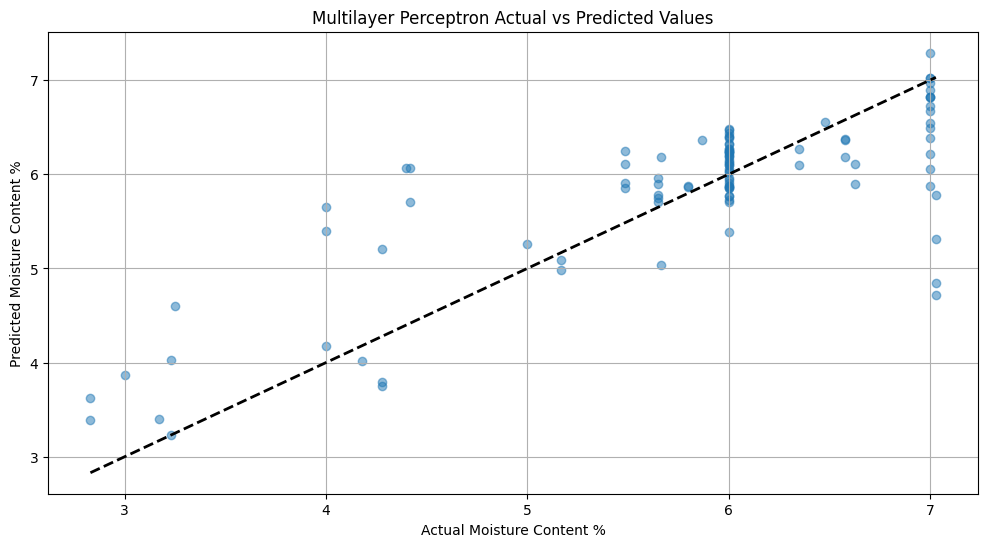

In [90]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_mlp, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Multilayer Perceptron Actual vs Predicted Values')
plt.xlabel('Actual Moisture Content %')
plt.ylabel('Predicted Moisture Content %')
plt.grid(True)
plt.show()

In [91]:
import pandas as pd
import os

# Define the file name
file_name = "drying_time_model_comparison.csv"

# Check if the file exists to determine whether to write the header
write_header = not os.path.exists(file_name)

# Create a DataFrame with both models' results
results = pd.DataFrame([
    {
        "Model": "Multiple Linear Regression",
        "MSE": mse_mlr,
        "RMSE": rmse_mlr,
        "MAE": mae_mlr,
        "R2": r2_mlr,
        "MAPE (%)": mape_mlr,
        "Accuracy (%)": accuracy_mlr
    },
    {

        "Model": "Random Forest Regression",
        "MSE": mse_rf,
        "RMSE": rmse_rf,
        "MAE": mae_rf,
        "R2": r2_rf,
        "MAPE (%)": mape_rf,
        "Accuracy (%)": accuracy_rf
    },
    {
        "Model": "Multilayer Perceptron",
        "MSE": mse_mlp,
        "RMSE": rmse_mlp,
        "MAE": mae_mlp,
        "R2": r2_mlp,
        "MAPE (%)": mape_mlp,
        "Accuracy (%)": accuracy_mlp
    }
])

# Append the results to the CSV file, writing header only if the file does not exist
results.to_csv(file_name, mode="a", index=False, header=write_header)

print("Metrics for both models have been saved.")


Metrics for both models have been saved.


In [92]:
import joblib

# Save the models
joblib.dump(model_mlr, 'mlr_drying_time_model.joblib')
joblib.dump(model_rf, 'rf_drying_time_model.joblib')
joblib.dump(model_mlp, 'mlp_drying_time_model.joblib')


# Save the shared scaler only once
joblib.dump(scaler, 'drying_time_scaler.joblib')

print("Models and scaler have been saved successfully.")


Models and scaler have been saved successfully.


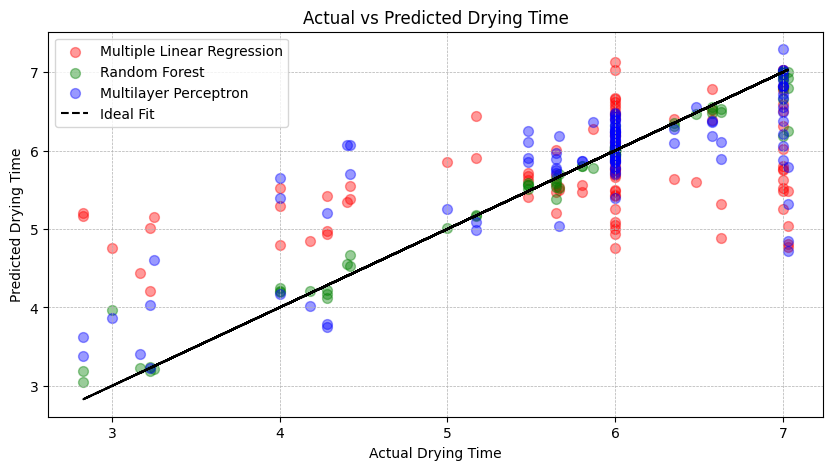

In [96]:
# Create scatter plot 
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_mlr, color='red', alpha=0.4, s=50, label='Multiple Linear Regression')  
plt.scatter(y_test, y_pred_rf, color='green', alpha=0.4, s=50, label='Random Forest')  
plt.scatter(y_test, y_pred_mlp, color='blue', alpha=0.4, s=50, label='Multilayer Perceptron')  

# Add reference line (ideal predictions)
plt.plot(y_test, y_test, linestyle='dashed', color='black', linewidth=1.5, label='Ideal Fit')

# Labels and title
plt.xlabel("Actual Drying Time")
plt.ylabel("Predicted Drying Time")
plt.title("Actual vs Predicted Drying Time")
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)

# Show plot
plt.show()
